## Exibindo os filtros convolucionais da rede

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Carregando o modelo e exibindo as camadas

In [2]:
#model = tf.keras.models.load_model('../modelos_salvos/tensorflow/modelo_mnist - acc = 0.9919.h5')
#model = tf.keras.models.load_model('../modelos_salvos/tensorflow/modelo_cifar10.h5')
#model = tf.keras.models.load_model('../modelos_salvos/tensorflow/modelo_cifar10 - acc = 0.6366.h5')
model = tf.keras.models.load_model('../modelos_salvos/tensorflow/modelo_cifar10 - acc = 0.4683.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 3)         2028      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 3)           0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 3)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 128)         24704     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

## A seguinte função so é valida para exibir os filtros da primeira camada
#### Na primeira camada os filtros vem no formato (kernel size x kernel size, numero de canais, numero de filtros)

In [3]:
def print_first_layer(model):
    k=0
    for layer in model.layers:

        if 'conv' in layer.name: 

            filter_, bias_= layer.get_weights()

            f_min, f_max = filter_.min(), filter_.max()
            filter_ = (filter_ - f_min) / (f_max - f_min)

            print('Filtros da {}° camada'.format(k+1))

            print('Kernel - ', filter_.shape[0],'x',filter_.shape[1],' | Canais - ', filter_.shape[2],' | Numero - ', filter_.shape[3])

            try:
                fig= plt.figure(figsize=(25,25))

                for i in range( filter_.shape[3] ):

                    p = filter_[:,:,:,i]
                    plt.subplot(8,16,i+1)
                    plt.xticks([])
                    plt.yticks([])
                    plt.grid(False)  
                    plt.imshow(p, cmap='gray')
                plt.show()
            except:
                #raise Exception('Invalid shape for image data')
                print('Invalid shape for image data')
        k=k+1

Filtros da 1° camada
Kernel -  15 x 15  | Canais -  3  | Numero -  3


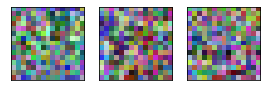

Filtros da 4° camada
Kernel -  8 x 8  | Canais -  3  | Numero -  128


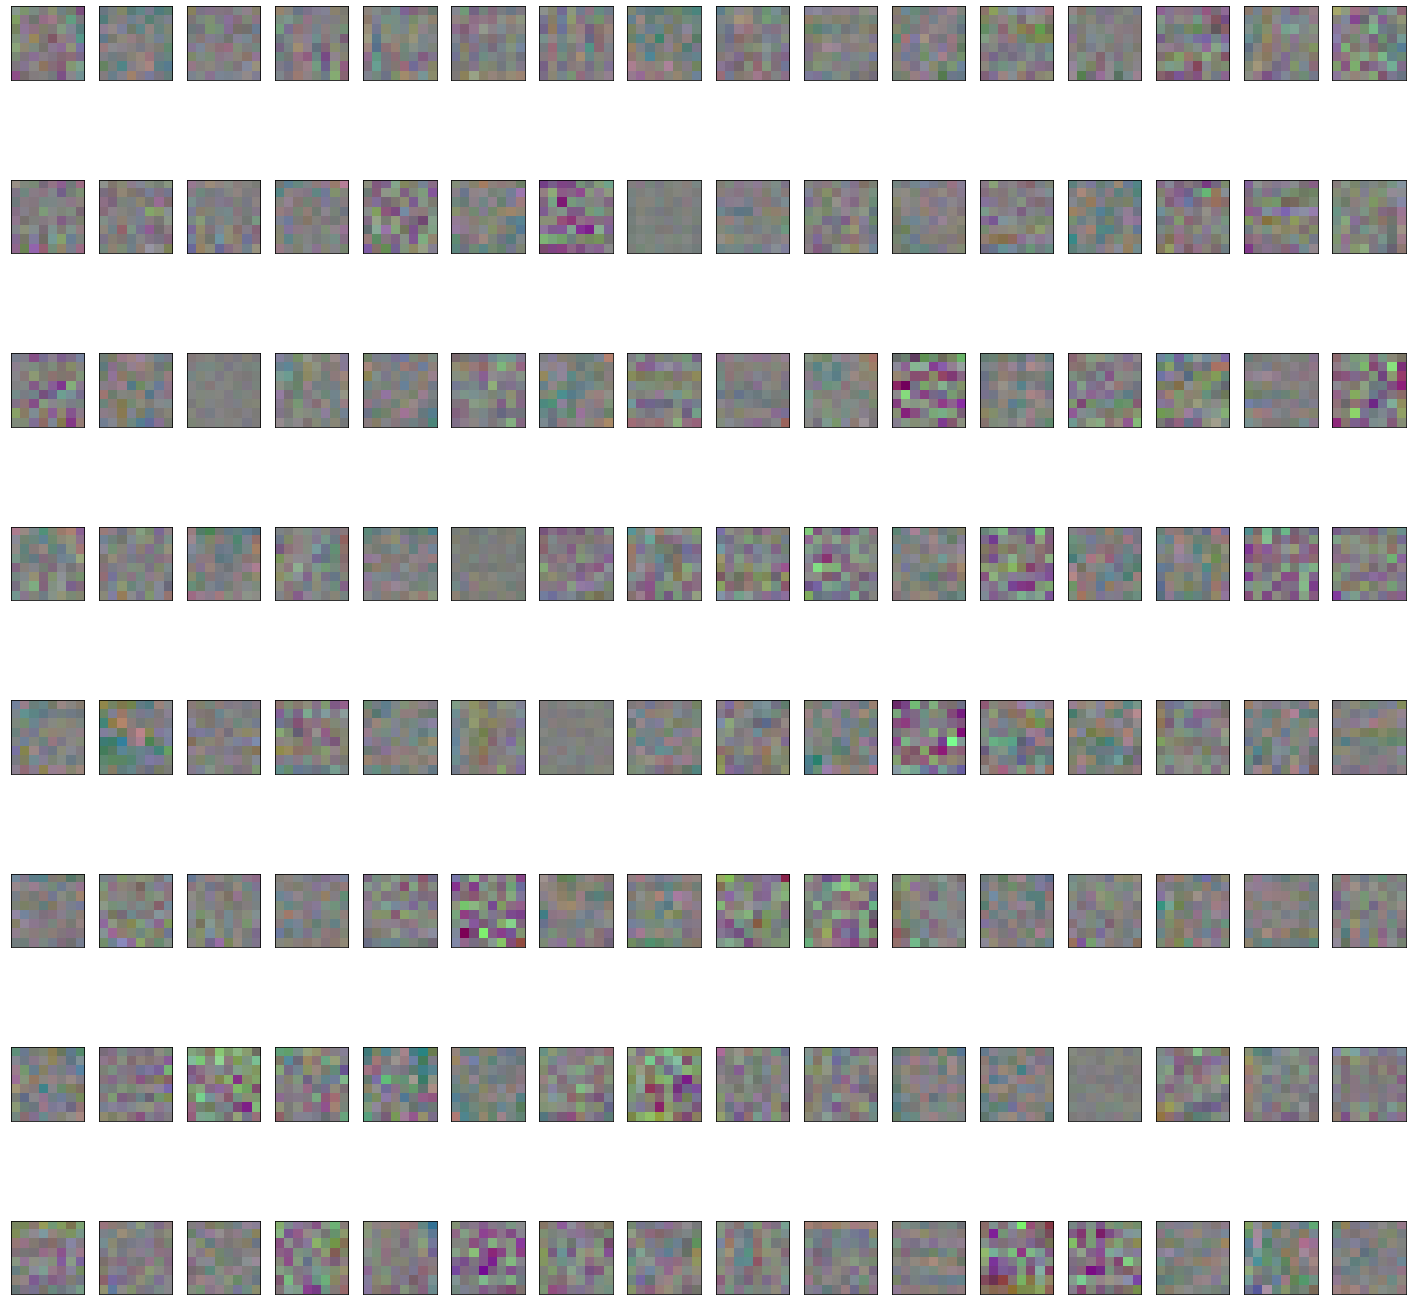

In [4]:
print_first_layer(model)

### Para exibir as outras camadas de forma adequada é necessario um tratamento mais complexo
#### Algumas referencias:
* https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/
* https://nbviewer.jupyter.org/github/BVLC/caffe/blob/master/examples/00-classification.ipynb
* https://stackoverflow.com/questions/39361943/how-can-visualize-tensorflow-convolution-filters
* https://stackoverflow.com/questions/33783672/how-can-i-visualize-the-weightsvariables-in-cnn-in-tensorflow
* https://stackoverflow.com/questions/35759220/how-to-visualize-learned-filters-on-tensorflow
* https://distill.pub/2020/circuits/visualizing-weights/
* https://colab.research.google.com/drive/1KlTzQAGvm-tA0zhGW_hP3Q37LztBz2V_?usp=sharing